# P1: Project EDA

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data overview

In [112]:
data_df = pd.read_csv('./trending_yt_videos_113_countries.csv')

In [113]:
data_df.shape

(3059099, 18)

In [114]:
data_df.head()

,title,channel_name,daily_rank,daily_movement,weekly_movement,snapshot_date,country,view_count,like_count,comment_count,description,thumbnail_url,video_id,channel_id,video_tags,kind,publish_date,langauge
0,Donator Calvins - Door Ratovharwa (Mjolo Offic...,Zimcelebs Tv,1,1,1,2025-04-21,ZW,359453,7000,560,Copyright 2025 © Donator Calvins\nShot Leoy V\...,https://i.ytimg.com/vi/Wd3UQcILT78/mqdefault.jpg,Wd3UQcILT78,UCwx1kRB_tFZZk92EKeaZRdw,NaN,youtube#video,2025-04-08 00:00:00+00:00,NaN
1,Winky D - Propaganda (Official Video),winkyonline,2,-1,-1,2025-04-21,ZW,571176,43730,7781,Purchase the full Riddim Compilation from stor...,https://i.ytimg.com/vi/UScy08GG_ko/mqdefault.jpg,UScy08GG_ko,UC9iqkdRHEbX7hwEu9D6J8wg,NaN,youtube#video,2025-04-04 00:00:00+00:00,NaN
2,Blessed Geza Calls For National Shutdown and E...,TechMag TV,3,4,47,2025-04-21,ZW,101523,1113,405,Blessed Geza Calls For National Shutdown and d...,https://i.ytimg.com/vi/K8P6cqDDRwo/mqdefault.jpg,K8P6cqDDRwo,UC5Cs-mGmXWdteODG5MyOlyw,NaN,youtube#video,2025-04-19 00:00:00+00:00,en
3,Jah Prayzah - Fambai Neni (Ndini Mukudzeyi Alb...,Jah Prayzah,4,-1,46,2025-04-21,ZW,138370,9078,1101,A spiritual offering ahead of the Ndini Mukudz...,https://i.ytimg.com/vi/ZtdvF83yLLo/mqdefault.jpg,ZtdvF83yLLo,UCPpVYvHuQSIkQwW1pJhfPrA,NaN,youtube#video,2025-04-17 00:00:00+00:00,NaN
4,Sabhuku Vharazipi episode 01,Sabhuku Vharazipi,5,0,45,2025-04-21,ZW,77231,2577,391,Sabhuku Vharazipi: Ndava kushuwiwa episode 01,https://i.ytimg.com/vi/bOruezUTrvc/mqdefault.jpg,bOruezUTrvc,UCabD9CBL-Bqjzz-xGP6NgDw,Sabhuku Vharazipi,youtube#video,2025-04-16 00:00:00+00:00,NaN


In [115]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3059099 entries, 0 to 3059098
Data columns (total 18 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   title            object
 1   channel_name     object
 2   daily_rank       int64 
 3   daily_movement   int64 
 4   weekly_movement  int64 
 5   snapshot_date    object
 6   country          object
 7   view_count       int64 
 8   like_count       int64 
 9   comment_count    int64 
 10  description      object
 11  thumbnail_url    object
 12  video_id         object
 13  channel_id       object
 14  video_tags       object
 15  kind             object
 16  publish_date     object
 17  langauge         object
dtypes: int64(6), object(12)
memory usage: 420.1+ MB


### Data cleaning

#### check missing values

In [116]:
data_df.isnull().sum()

title                    0
channel_name             0
daily_rank               0
daily_movement           0
weekly_movement          0
snapshot_date            0
country                  0
view_count               0
like_count               0
comment_count            0
description         576002
thumbnail_url            0
video_id                 0
channel_id               0
video_tags         1024253
kind                     0
publish_date             0
langauge            779748
dtype: int64

In [117]:
data_df = data_df[data_df['view_count'] > 0]

In [118]:
data_df['snapshot_date'] = pd.to_datetime(data_df['snapshot_date'])
data_df['publish_date'] = pd.to_datetime(data_df['publish_date'])

In [119]:
data_df['video_tags'] = data_df['video_tags'].fillna('') 

In [120]:
data_df = data_df.drop('description', axis=1)

In [121]:
data_df = data_df.drop('langauge', axis=1)

In [122]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3058329 entries, 0 to 3059098
Data columns (total 16 columns):
 #   Column           Dtype              
---  ------           -----              
 0   title            object             
 1   channel_name     object             
 2   daily_rank       int64              
 3   daily_movement   int64              
 4   weekly_movement  int64              
 5   snapshot_date    datetime64[ns]     
 6   country          object             
 7   view_count       int64              
 8   like_count       int64              
 9   comment_count    int64              
 10  thumbnail_url    object             
 11  video_id         object             
 12  channel_id       object             
 13  video_tags       object             
 14  kind             object             
 15  publish_date     datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), int64(6), object(8)
memory usage: 396.7+ MB


In [123]:
data_df.isnull().sum()

title              0
channel_name       0
daily_rank         0
daily_movement     0
weekly_movement    0
snapshot_date      0
country            0
view_count         0
like_count         0
comment_count      0
thumbnail_url      0
video_id           0
channel_id         0
video_tags         0
kind               0
publish_date       0
dtype: int64

In [124]:
data_df.columns

Index(['title', 'channel_name', 'daily_rank', 'daily_movement',
       'weekly_movement', 'snapshot_date', 'country', 'view_count',
       'like_count', 'comment_count', 'thumbnail_url', 'video_id',
       'channel_id', 'video_tags', 'kind', 'publish_date'],
      dtype='object')

In [125]:
data_df.head()

,title,channel_name,daily_rank,daily_movement,weekly_movement,snapshot_date,country,view_count,like_count,comment_count,thumbnail_url,video_id,channel_id,video_tags,kind,publish_date
0,Donator Calvins - Door Ratovharwa (Mjolo Offic...,Zimcelebs Tv,1,1,1,2025-04-21,ZW,359453,7000,560,https://i.ytimg.com/vi/Wd3UQcILT78/mqdefault.jpg,Wd3UQcILT78,UCwx1kRB_tFZZk92EKeaZRdw,,youtube#video,2025-04-08 00:00:00+00:00
1,Winky D - Propaganda (Official Video),winkyonline,2,-1,-1,2025-04-21,ZW,571176,43730,7781,https://i.ytimg.com/vi/UScy08GG_ko/mqdefault.jpg,UScy08GG_ko,UC9iqkdRHEbX7hwEu9D6J8wg,,youtube#video,2025-04-04 00:00:00+00:00
2,Blessed Geza Calls For National Shutdown and E...,TechMag TV,3,4,47,2025-04-21,ZW,101523,1113,405,https://i.ytimg.com/vi/K8P6cqDDRwo/mqdefault.jpg,K8P6cqDDRwo,UC5Cs-mGmXWdteODG5MyOlyw,,youtube#video,2025-04-19 00:00:00+00:00
3,Jah Prayzah - Fambai Neni (Ndini Mukudzeyi Alb...,Jah Prayzah,4,-1,46,2025-04-21,ZW,138370,9078,1101,https://i.ytimg.com/vi/ZtdvF83yLLo/mqdefault.jpg,ZtdvF83yLLo,UCPpVYvHuQSIkQwW1pJhfPrA,,youtube#video,2025-04-17 00:00:00+00:00
4,Sabhuku Vharazipi episode 01,Sabhuku Vharazipi,5,0,45,2025-04-21,ZW,77231,2577,391,https://i.ytimg.com/vi/bOruezUTrvc/mqdefault.jpg,bOruezUTrvc,UCabD9CBL-Bqjzz-xGP6NgDw,Sabhuku Vharazipi,youtube#video,2025-04-16 00:00:00+00:00


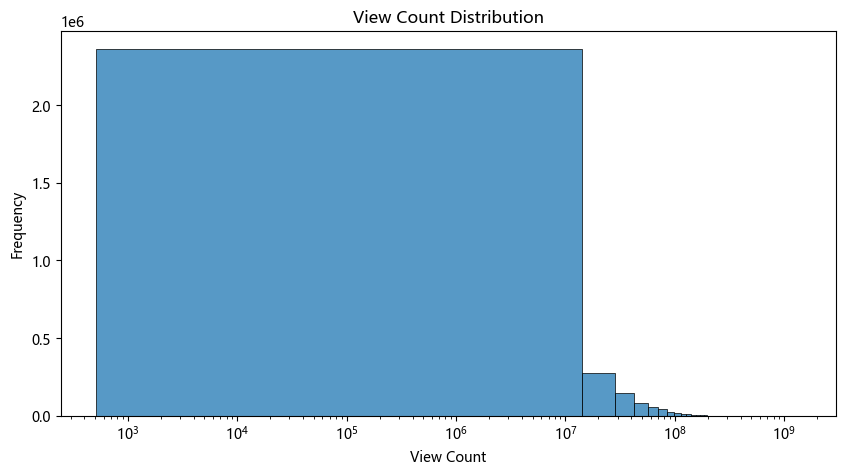

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.histplot(data_df['view_count'], bins=100)
plt.title('View Count Distribution')
plt.xlabel('View Count')
plt.ylabel('Frequency')
plt.xscale('log')
plt.show()

# P2: Project with supervised learning

In [127]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [179]:
# Sample a subset of data to reduce computational load for GridSearchCV
sample_df = data_df.sample(n=100000, random_state=42).copy()

In [180]:
# Extract the week number from publish_date. I use this because trends are usually short-term, so analyzing by week
sample_df['week'] = sample_df['publish_date'].dt.isocalendar().week

In [181]:
# For each week, I look at the most common tags (top 10) and use them to define the weekly trending tags.
# Even though the 'video_tags' column has quite a lot of missing data, I still decide to use tags instead of titles here.
# This is because tags are keywords marked by the creator (or the platform system) and usually give a very focused, clear summary of the video’s main topics.
# On the other hand, while the title also contains rich information, the title is going to be used later as an input feature for the model.
# If I also use the title to define the target label here, it could lead to overfitting.
# So the model might just learn to recognize patterns it has already seen in the labels, not because it generalizes well, but because fed it the answers.
top_trend_tags = set()
for week, group in sample_df.groupby('week'):
    tag_series = group['video_tags'].str.split('|').explode()
    top_tags = tag_series.value_counts().head(10).index
    top_trend_tags.update(top_tags)

In [182]:
# Check if a video has at least one trending tag.
def has_trend_tag(row):
    if pd.isna(row['video_tags']):
        return 0
    return int(any(tag in top_trend_tags for tag in row['video_tags'].split('|') if tag.strip()))

In [183]:
# Apply the function to get is_trend column (used as binary label for classification).
sample_df['is_trend'] = sample_df.apply(has_trend_tag, axis=1)
print(sample_df['is_trend'].value_counts())

0    88520
1    11480
Name: is_trend, dtype: int64


In [184]:
# Select numeric features and scale them using StandardScaler.
numeric_features = ['daily_rank', 'daily_movement', 'weekly_movement','view_count', 'like_count', 'comment_count']
X_numeric = sample_df[numeric_features]
scaler = StandardScaler()
X_numeric_scaled = scaler.fit_transform(X_numeric)

In [185]:
# The weekday of publishing might also matter, like some videos get more popular on weekends.
# I use OneHot since weekday only has a few fixed values.
ohe_weekday = OneHotEncoder(sparse_output=False)
weekday_ohe = ohe_weekday.fit_transform(sample_df['publish_date'].dt.weekday.values.reshape(-1,1))

In [186]:
# Different countries have different watching habits, so I use OneHot encoding for country.
ohe_country = OneHotEncoder(sparse_output=False)
country_ohe = ohe_country.fit_transform(sample_df[['country']].astype(str))

In [187]:
# For channel_name, since there are too many unique values, I don’t use OneHot.
# Instead I use LabelEncoder to turn them into integers.
le_channel = LabelEncoder()
channel_encoded = le_channel.fit_transform(sample_df['channel_name'].astype(str)).reshape(-1,1)

In [188]:
# Combine all the features into final X. Then set y using the trend label created before.
X = np.hstack([X_numeric_scaled, weekday_ohe, country_ohe, channel_encoded])
y = sample_df['is_trend'].values

In [189]:
# Split the dataset into training and testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Tree-based model (RandomForest)

In [190]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

#### GridSearchCV

In [191]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42, n_jobs=-1, class_weight='balanced'),
    param_grid=param_grid,
    cv=3,
    scoring='f1',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print("Best params from GridSearchCV:", grid_search.best_params_)

Best params from GridSearchCV: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}


In [192]:
y_pred = best_model.predict(X_test)

print("Performance of GridSearch-tuned Random Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Performance of GridSearch-tuned Random Forest:
Accuracy: 0.9359
Precision: 0.881203007518797
Recall: 0.5104529616724739
F1 Score: 0.646442360728075
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     17704
           1       0.88      0.51      0.65      2296

    accuracy                           0.94     20000
   macro avg       0.91      0.75      0.81     20000
weighted avg       0.93      0.94      0.93     20000



##### Visualize

In [193]:
import matplotlib.pyplot as plt

In [194]:
importances = best_model.feature_importances_

In [195]:
feature_names = (numeric_features +
                 ['weekday_' + str(i) for i in range(weekday_ohe.shape[1])] +
                 ['country_' + str(i) for i in range(country_ohe.shape[1])] +
                 ['channel_encoded'])

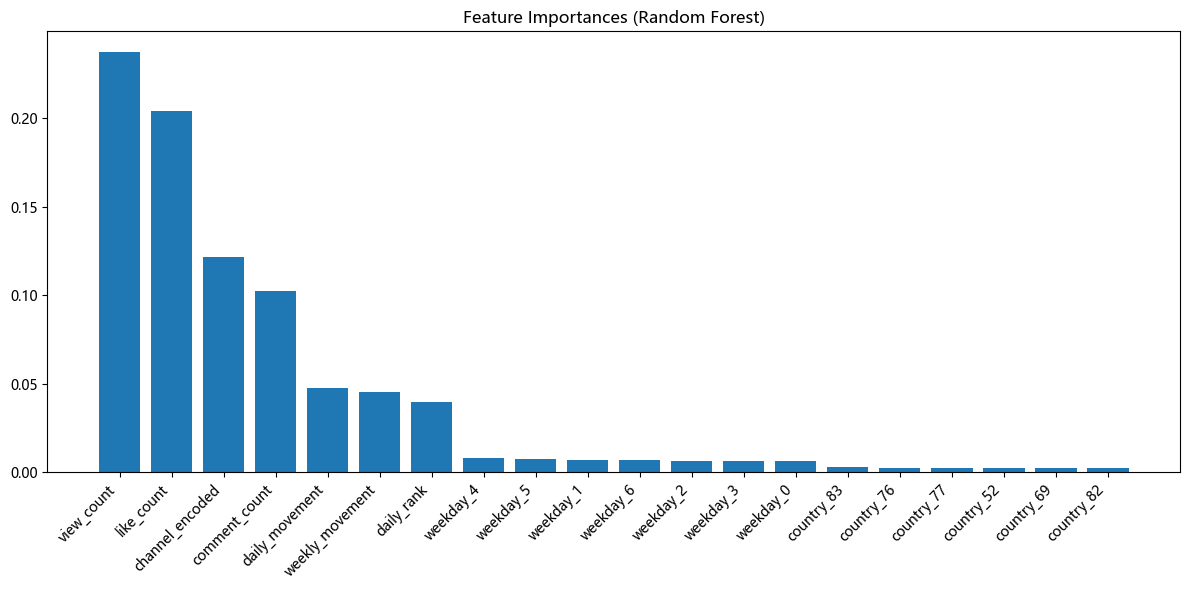

In [196]:
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12, 6))
plt.title("Feature Importances (Random Forest)")
plt.bar(range(20), importances[indices][:20])
plt.xticks(range(20), [feature_names[i] for i in indices[:20]], rotation=45, ha='right')
plt.tight_layout()
plt.show()

The most important features according to the Random Forest are view_count, like_count, channel_encoded, comment_count, and daily_movement. This makes sense because trending prediction is likely driven by content popularity and engagement signals.

##### Error Analysis

In [197]:
y_pred = best_model.predict(X_test)

In [198]:
results_rf_df = pd.DataFrame(X_test, columns=feature_names)
results_rf_df['true_label'] = y_test
results_rf_df['predicted_label'] = y_pred

In [199]:
errors_rf_df = results_rf_df[results_rf_df['true_label'] != results_rf_df['predicted_label']]
print(errors_rf_df['true_label'].value_counts())

1    1124
0     158
Name: true_label, dtype: int64


In [200]:
numeric_cols = results_rf_df.select_dtypes(include=['number']).columns
numeric_cols = [col for col in numeric_cols if col not in ['true_label', 'predicted_label']]

In [201]:
error_means_rf = errors_rf_df[numeric_cols].mean()
overall_means_rf = results_rf_df[numeric_cols].mean()

In [202]:
mean_diff_rf = pd.DataFrame({
    'error_mean': error_means_rf,
    'overall_mean': overall_means_rf,
    'difference': error_means_rf - overall_means_rf
}).sort_values(by='difference', key=abs, ascending=False)

print(mean_diff_rf)

                  error_mean  overall_mean  difference
channel_encoded  7586.714509   8051.036600 -464.322091
view_count          0.315938     -0.003384    0.319322
like_count          0.228868      0.004224    0.224644
comment_count       0.094554      0.008850    0.085704
daily_movement     -0.068159      0.007522   -0.075680
...                      ...           ...         ...
country_98          0.009360      0.009200    0.000160
country_35          0.009360      0.009250    0.000110
country_54          0.007800      0.007900   -0.000100
country_36          0.010140      0.010050    0.000090
country_60          0.008580      0.008550    0.000030

[127 rows x 3 columns]


In the misclassified samples, most of the errors happen when the true label is 1—that is, the video was actually trending, but the model predicted it as not trending. This shows the model still has more trouble recognizing trending videos than non-trending ones. A likely reason is that the dataset is imbalanced—non-trending videos make up the majority, so the model learns more from those and ends up being less sensitive to the smaller trending class.

To deal with this, I added class_weight='balanced' when training the Random Forest. That way, the model gives more weight to trending videos during training and treats their misclassification as a bigger deal.

If we look at which features are different between the misclassified samples and the whole test set, the biggest differences are in view_count, like_count, comment_count,daily_movement. These are all engagement-related or visibility-related features. In the misclassified cases, view_count, like_count and comment_count are actually higher than average—which means the model still got it wrong even when the video had good engagement. On the flip side, daily_movement tend to be lower in the errors, suggesting those videos might have had views and likes, but weren’t moving up fast enough in rank to convince the model they were trending.

So overall, the model does well with the really obvious trending videos—the ones with both high engagement and strong movement—but it struggles more with “borderline” cases. These are videos that are doing okay in some areas, but not strong enough across the board to trigger a confident prediction. That’s where most of the mistakes seem to come from.

One way to keep improving could be to further balance the dataset—for example, by sampling equal numbers of trending and non-trending videos during training. It might also help to add more features that describe trend potential in other ways, especially for those in-between cases that are easy to miss.

### linear model (LogisticRegression)

In [203]:
from sklearn.linear_model import LogisticRegression

#### GridSearchCV

In [204]:
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

grid_search_lr = GridSearchCV(
    estimator=LogisticRegression(class_weight='balanced', max_iter=1000),
    param_grid=param_grid_lr,
    scoring='f1',
    cv=3,
    n_jobs=-1
)

grid_search_lr.fit(X_train, y_train)

best_lr = grid_search_lr.best_estimator_
print("Best LogisticRegression Params:", grid_search_lr.best_params_)

Best LogisticRegression Params: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}


In [205]:
y_pred = best_lr.predict(X_test)

print("Performance of GridSearch-tuned Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Performance of GridSearch-tuned Logistic Regression:
Accuracy: 0.8292
Precision: 0.354014598540146
Recall: 0.5914634146341463
F1 Score: 0.4429223744292237
              precision    recall  f1-score   support

           0       0.94      0.86      0.90     17704
           1       0.35      0.59      0.44      2296

    accuracy                           0.83     20000
   macro avg       0.65      0.73      0.67     20000
weighted avg       0.87      0.83      0.85     20000



##### Top-n coefficient features

In [206]:
coef = best_lr.coef_.flatten()

In [207]:
coef_df = pd.DataFrame({'feature': feature_names, 'coefficient': coef})

In [208]:
filtered_df = coef_df[~coef_df['feature'].str.startswith(('country_', 'weekday_'))]

In [209]:
top_positive = filtered_df.sort_values(by='coefficient', ascending=False).head(10)
print("Top 10 positive coefficients:")
print(top_positive)

Top 10 positive coefficients:
             feature  coefficient
3         view_count     1.302022
5      comment_count     0.590992
2    weekly_movement     0.004630
126  channel_encoded     0.000011
1     daily_movement    -0.072461
0         daily_rank    -0.146629
4         like_count    -0.470432


The top positive coef according are view_count, comment_count, and weekly_movement. This makes sense because trending prediction is likely driven by content popularity and engagement signals.

In [210]:
top_negative = filtered_df.sort_values(by='coefficient', ascending=True).head(10)
print("\nTop 10 negative coefficients:")
print(top_negative)


Top 10 negative coefficients:
             feature  coefficient
4         like_count    -0.470432
0         daily_rank    -0.146629
1     daily_movement    -0.072461
126  channel_encoded     0.000011
2    weekly_movement     0.004630
5      comment_count     0.590992
3         view_count     1.302022


After training the logistic regression model with GridSearchCV, I looked at the top features with the highest and lowest coefficients. These tell us which features the model thinks are the most helpful for predicting whether a video is trending.

The most positively weighted features are view_count, comment_count, and weekly_movement. These are all related to engagement and activity, which makes sense—videos that get a lot of views and comments or have rapid weekly movement are more likely to be trending, so the model gives those features strong positive weights.

The most negatively weighted features are like_count, daily_rank, and daily_movement. This means that when these values are lower, the model becomes less confident that a video is trending. One thing that stands out here is that like_count has a negative coefficient. While we’d normally think of likes as a good sign, this might be because some trending videos get a lot of views but not a lot of actual engagement. In some cases, it could even be due to things like view boosting or artificially inflated view counts. That might explain why the model doesn’t treat a high view count with low likes as a strong signal for trending.

In short, the model sees high views and comments as strong signals for trending, but it may down-weight likes and certain types of rank-based features if they don’t consistently match trending patterns in the dataset.

##### Error analysis

In [211]:
y_pred = best_lr.predict(X_test)

In [212]:
results_lr_df = pd.DataFrame(X_test, columns=feature_names)
results_lr_df['true_label'] = y_test
results_lr_df['predicted_label'] = y_pred

errors_lr_df = results_lr_df[results_lr_df['true_label'] != results_lr_df['predicted_label']]

In [213]:
print(errors_lr_df['true_label'].value_counts())

0    2478
1     938
Name: true_label, dtype: int64


In [214]:
numeric_cols = results_lr_df.select_dtypes(include=['number']).columns
numeric_cols = [col for col in numeric_cols if col not in ['true_label', 'predicted_label']]

In [215]:
error_means_lr = errors_lr_df[numeric_cols].mean()
overall_means_lr = results_lr_df[numeric_cols].mean()

In [216]:
mean_diff_lr = pd.DataFrame({
    'error_mean': error_means_lr,
    'overall_mean': overall_means_lr,
    'difference': error_means_lr - overall_means_lr
}).sort_values(by='difference', key=abs, ascending=False)

print(mean_diff_lr)

                  error_mean  overall_mean  difference
channel_encoded  7782.310304   8051.036600 -268.726296
view_count          0.970388     -0.003384    0.973773
like_count          0.904054      0.004224    0.899831
comment_count       0.382527      0.008850    0.373677
weekly_movement    -0.169080      0.008343   -0.177424
...                      ...           ...         ...
country_6           0.007904      0.008200   -0.000296
country_90          0.009368      0.009100    0.000268
country_79          0.008782      0.008600    0.000182
country_1           0.009075      0.009100   -0.000025
country_40          0.008489      0.008500   -0.000011

[127 rows x 3 columns]


After training the logistic regression model using GridSearchCV, most of the misclassified samples still come from the true label = 1 category. This means that many of the videos that actually were trending got predicted as not trending. It suggests the model continues to struggle more with identifying trending videos than non-trending ones.

The class_weight='balanced' parameter was used to help reduce the effects of class imbalance during training. But the errors are still mostly concentrated in the minority class, which shows that this strategy only partially helped the model attend to the less frequent label.

Looking at the features where the error samples differ most from the overall test set, the biggest differences are in view_count, like_count, and comment_count, all of which are higher on average in the misclassified group. These are typical engagement indicators. So, even when a video had high views and interactions, the model still missed some of them. This suggests that the model is still not handling “borderline” trending videos very well—those that have strong numbers in some areas but don’t check every box.

weekly_movement shows up with a lower average in the error group, which could mean that although those videos were performing okay in engagement, they weren’t gaining rank or momentum as quickly. That might explain why the model didn’t classify them as trending.

It’s also worth noting that even though like_count seems like it should be a strong positive indicator, it has a negative coefficient in the model. This might be related to videos that gain a lot of views but don’t receive many likes, which could point to patterns like view inflation or low engagement quality. The model may interpret that as a weaker trending signal.

So overall, the model can capture some of the more obvious trending patterns, but it still misses many trending videos that aren’t as consistent across all features.

##### Compare two models

After tuning both models using GridSearchCV, Random Forest still does better overall. Its accuracy is about 0.93, and on the trending class (label = 1), the precision is 0.88, recall is 0.51, and F1 is 0.65. So it's able to catch a good number of trending videos and doesn't make too many wrong positive predictions.

Logistic Regression's results are weaker even after tuning. Accuracy is 0.82, and for label = 1, precision is only 0.35, and F1 score is 0.45. The recall is also 0.59, because the precision is much lower, the overall F1 drops. So the model does pick up some trending videos, but it also wrongly predicts a lot of non-trending ones as trending.

This probably has to do with how the models work. Logistic Regression is a linear model, so it doesn’t capture complex patterns very well. Random Forest is a non-linear model and does better with this kind of data. Also, Random Forest is an ensemble method, so the final prediction is more stable. Logistic Regression doesn’t have that.

Overall, even though both models used class_weight='balanced' and were tuned with cross-validation, Random Forest is still a better fit for this task.

# P3: project with unsupervised learning

In this project, I wanted to understand what kinds of videos are more likely to become trends. Besides using supervised learning to predict trends, unsupervised learning can help me explore the content itself. I wanted to see if videos with similar titles or tags naturally group together—and if some of these groups have more trending videos. It’s not for prediction, but for spotting patterns in the data that might explain why some content performs better. It helped me see if the structure of the content matches with trend behavior.

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from gensim import corpora
from gensim.models import LdaModel
from gensim.parsing.preprocessing import preprocess_string

I used two models for unsupervised learning:

KMeans (on video titles):
I applied KMeans to cluster video titles after converting them into TF-IDF vectors. I picked titles for KMeans because they’re short and full of keywords—so TF-IDF works well for capturing the main message. Then I looked at which clusters had more trending videos to see if certain title patterns (like style or phrasing) are related to trends.

LDA (on video tags):
For LDA, I used the video tags instead of titles because tags are more structured and consistent. They’re usually manually added or based on content categories, which makes them a better fit for topic modeling. LDA helped me identify broader themes in the dataset—like music, gaming, or comedy—and evaluate whether certain topics are more trend-prone.

So overall, I used titles for KMeans because they’re more free-form and good for vector-based clustering, and tags for LDA because they’re cleaner and work better for identifying latent topics.

### KMeans(Based on title)

In [159]:
# Label each video with a binary 'is_trend' flag based on predefined trend tags
data_df['is_trend'] = data_df.apply(has_trend_tag, axis=1)

In [160]:
# The full dataset is very large, so I sampled a representative subset to reduce runtime
sample_df = data_df.sample(n=100000, random_state=42)

In [161]:
# Convert video titles into TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer(
    stop_words='english',
    max_features=2000,
    ngram_range=(1, 2)
)
X_sample_tfidf = tfidf_vectorizer.fit_transform(sample_df['title'].fillna('').astype(str))

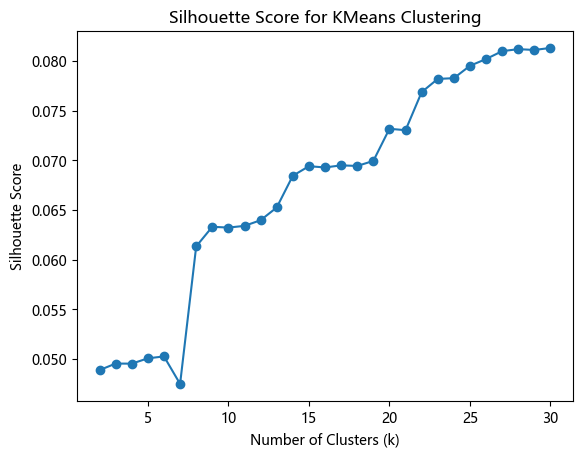

In [ ]:
# Use silhouette scores to find a good k 
sil_scores = []
k_range = range(2, 31)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_sample_tfidf) 
    score = silhouette_score(X_sample_tfidf, kmeans.labels_) 
    sil_scores.append(score)

plt.plot(k_range, sil_scores, marker='o')
plt.title("Silhouette Score for KMeans Clustering")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.show()

I looked at silhouette scores for different k values and noticed the score keeps improving until around k=25, after which the gains become very small. So I considered 25 a good point where the clustering structure stabilizes.

In [162]:
# Run KMeans with the selected number of clusters
k = 25
kmeans = KMeans(n_clusters=k, random_state=42)
sample_df['kmeans_cluster'] = kmeans.fit_predict(X_sample_tfidf)

In [163]:
# I wanted to understand which clusters are more likely to contain trending videos.
# So for each KMeans cluster, I calculated the trend rate (i.e., how many videos in the cluster are labeled as trending)
# and the total number of videos. This gives me a basic idea of where trending content is concentrated.
for i in range(k):
    cluster_data = sample_df[sample_df['kmeans_cluster'] == i]
    trend_rate = cluster_data['is_trend'].mean()
    print(f"Cluster {i} - Trend Rate: {trend_rate:.2f}, Count: {len(cluster_data)}")

Cluster 0 - Trend Rate: 0.28, Count: 467
Cluster 1 - Trend Rate: 0.13, Count: 73161
Cluster 2 - Trend Rate: 0.00, Count: 86
Cluster 3 - Trend Rate: 0.01, Count: 205
Cluster 4 - Trend Rate: 0.05, Count: 2542
Cluster 5 - Trend Rate: 0.02, Count: 807
Cluster 6 - Trend Rate: 0.05, Count: 5841
Cluster 7 - Trend Rate: 0.01, Count: 1236
Cluster 8 - Trend Rate: 0.02, Count: 1103
Cluster 9 - Trend Rate: 0.23, Count: 492
Cluster 10 - Trend Rate: 0.09, Count: 557
Cluster 11 - Trend Rate: 0.07, Count: 1438
Cluster 12 - Trend Rate: 0.10, Count: 157
Cluster 13 - Trend Rate: 0.10, Count: 368
Cluster 14 - Trend Rate: 0.03, Count: 2057
Cluster 15 - Trend Rate: 0.00, Count: 329
Cluster 16 - Trend Rate: 0.13, Count: 617
Cluster 17 - Trend Rate: 0.03, Count: 561
Cluster 18 - Trend Rate: 0.20, Count: 389
Cluster 19 - Trend Rate: 0.90, Count: 174
Cluster 20 - Trend Rate: 0.15, Count: 1055
Cluster 21 - Trend Rate: 0.16, Count: 1743
Cluster 22 - Trend Rate: 0.07, Count: 3530
Cluster 23 - Trend Rate: 0.08, Cou

In [164]:
# After checking trend rates, I realized that some clusters have very high trend rates but very few videos,
# which might not be reliable. So I created a new metric to balance trend rate and sample size:
#score = trend_rate * log(video count)
# This way, I can highlight clusters that are both high in trend rate and statistically meaningful in size.
for i in range(k):
    cluster_data = sample_df[sample_df['kmeans_cluster'] == i]
    trend_rate = cluster_data['is_trend'].mean()
    count = len(cluster_data)
    score = trend_rate * np.log1p(count)
    print(f"Cluster {i} - Trend Rate: {trend_rate:.2f}, Count: {count}, Score: {score:.2f}")

Cluster 0 - Trend Rate: 0.28, Count: 467, Score: 1.74
Cluster 1 - Trend Rate: 0.13, Count: 73161, Score: 1.41
Cluster 2 - Trend Rate: 0.00, Count: 86, Score: 0.00
Cluster 3 - Trend Rate: 0.01, Count: 205, Score: 0.08
Cluster 4 - Trend Rate: 0.05, Count: 2542, Score: 0.38
Cluster 5 - Trend Rate: 0.02, Count: 807, Score: 0.16
Cluster 6 - Trend Rate: 0.05, Count: 5841, Score: 0.43
Cluster 7 - Trend Rate: 0.01, Count: 1236, Score: 0.09
Cluster 8 - Trend Rate: 0.02, Count: 1103, Score: 0.11
Cluster 9 - Trend Rate: 0.23, Count: 492, Score: 1.40
Cluster 10 - Trend Rate: 0.09, Count: 557, Score: 0.57
Cluster 11 - Trend Rate: 0.07, Count: 1438, Score: 0.51
Cluster 12 - Trend Rate: 0.10, Count: 157, Score: 0.52
Cluster 13 - Trend Rate: 0.10, Count: 368, Score: 0.59
Cluster 14 - Trend Rate: 0.03, Count: 2057, Score: 0.25
Cluster 15 - Trend Rate: 0.00, Count: 329, Score: 0.00
Cluster 16 - Trend Rate: 0.13, Count: 617, Score: 0.86
Cluster 17 - Trend Rate: 0.03, Count: 561, Score: 0.18
Cluster 18 - 

In [165]:
# After identifying clusters with higher trend scores,
# I wanted to examine the top TF-IDF terms that define each cluster.
# This helps interpret what kinds of titles dominate each group — for example, 
# whether they're defined by language, content type ("shorts", "vlog", etc.), or theme ("funny", "game", etc.).
# It also lets me cross-check if the high-trend clusters are semantically meaningful or just noise.

# I empirically consider clusters with score > 1.0 as trend clusters,
# because they combine relatively high trend rate and reliable sample size.
terms = tfidf_vectorizer.get_feature_names_out()
centroids = kmeans.cluster_centers_

for i in range(k):
    top_terms = centroids[i].argsort()[::-1][:10]
    print(f"\nCluster {i} top words:")
    print([terms[j] for j in top_terms])


Cluster 0 top words:
['secret', 'built secret', 'built', 'secret shorts', 'room', 'secret vlog', 'shorts', 'vlog', 'glow', 'stick']

Cluster 1 top words:
['shorts', 'vs', 'funny', 'challenge', 'من', 'bölüm', '000', 'world', 'highlights', '2025']

Cluster 2 top words:
['для', 'из', 'новостничок', 'но', 'на', 'как', 'от', 'shorts', 'про', 'за']

Cluster 3 top words:
['days', 'stranded', 'spent', 'city', 'island', 'survived', 'abandoned', '100 days', '100', 'minecraft']

Cluster 4 top words:
['official video', 'video', 'official', 'ft', 'feat', 'video 2024', '2024', 'desingerica', 'la', 'jennie']

Cluster 5 top words:
['ft', 'qui', 'prod', 'le', 'official', 'et', 'clip', 'officiel', 'la', 'est']

Cluster 6 top words:
['la', 'en', 'el', 'los', 'del', 'que', 'mi', 'se', 'en la', 'en el']

Cluster 7 top words:
['oficial', 'video oficial', 'video', 'la', 'el', 'remix', 'remix video', 'peso', 'yailin la', 'yailin']

Cluster 8 top words:
['مع', 'تحدي', 'في', 'من', 'فالكونز', 'على', 'مع شباب', 

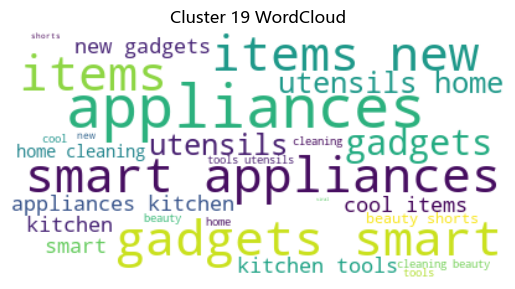

In [166]:
# here I pick Cluster 19
# The word cloud shows words like "appliances", "gadgets", "smart", and "home"
# suggest it's about product or item sharing—maybe like home goods or shopping content.
from wordcloud import WordCloud

i = 19
top_terms = centroids[i].argsort()[::-1][:30]
words = {terms[j]: centroids[i][j] for j in top_terms}

wc = WordCloud(background_color='white').generate_from_frequencies(words)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title(f"Cluster {i} WordCloud")
plt.show()

In [ ]:
# To validate the word cloud, I checked actual titles in Cluster 19.
# Many titles mention "appliances", "smart", "kitchen" which matches the top words.
cluster_19_titles = sample_df[sample_df['kmeans_cluster'] == 19]['title']
print(cluster_19_titles.sample(10).tolist())

['Cool Items!🥰 New Gadgets, Smart Appliances, Kitchen Tools Utensils, Home Cleaning, Beauty #shorts', 'Cool Items!🥰 New Gadgets, Smart Appliances, Kitchen Tools Utensils, Home Cleaning, Beauty #shorts', 'Cool Items!🥰 New Gadgets, Smart Appliances, Kitchen Tools Utensils, Home Cleaning, Beauty #shorts', 'Cool Items!🥰 New Gadgets, Smart Appliances, Kitchen Tools Utensils, Home Cleaning, Beauty #shorts', 'Cool Items!🥰 New Gadgets, Smart Appliances, Kitchen Tools Utensils, Home Cleaning, Beauty #shorts', 'Cool Items!🥰 New Gadgets, Smart Appliances, Kitchen Tools Utensils, Home Cleaning, Beauty #shorts', 'Cool Items!🥰 New Gadgets, Smart Appliances, Kitchen Tools Utensils, Home Cleaning, Beauty #shorts', 'Cool Items!🥰 New Gadgets, Smart Appliances, Kitchen Tools Utensils, Home Cleaning, Beauty #shorts', 'Cool Items!🥰 New Gadgets, Smart Appliances, Kitchen Tools Utensils, Home Cleaning, Beauty #shorts', 'Cool Items!🥰 New Gadgets, Smart Appliances, Kitchen Tools Utensils, Home Cleaning, Beauty

#### Evaluate and interprete the model performance

For KMeans, I used both the trend rate and a score metric (trend rate × log of video count) to evaluate the clusters. The score helped me balance how “viral” a cluster was and how trustworthy that signal was, based on how many videos it included. Cluster 19 ended up with the highest score. When I looked at the keywords and example titles, I found that this cluster was mostly about product-related videos like “smart appliances”, “gadgets”, “home cleaning”, and other household items. I didn’t expect this type of content to stand out, but the model grouped them together and they turned out to have a higher chance of trending. So I think KMeans actually helped me discover a content pattern: short videos that share practical items or small gadgets tend to perform well.

### LDA(Based on tag)

In [140]:
sample_df = data_df.sample(n=100000, random_state=42)

In [145]:
# Re-add the binary trend label so LDA results can be evaluated
sample_df['is_trend'] = sample_df.apply(has_trend_tag, axis=1)

In [141]:
# Clean and tokenize video_tags
processed_tags = sample_df['video_tags'].apply(lambda x: preprocess_string(x))
dictionary = corpora.Dictionary(processed_tags)
corpus = [dictionary.doc2bow(text) for text in processed_tags]

For LDA, I set the number of topics to 7. There’s no fixed rule for picking this number, so I just tried a few values and picked the one that gave me the most interpretable results.

In [142]:
# Train an LDA topic model using the Gensim library
lda = LdaModel(corpus=corpus, id2word=dictionary, num_topics=7, random_state=42, passes=10)
topics = lda.print_topics(num_words=10)
for topic in topics:
    print(topic)

(0, '0.013*"minecraft" + 0.012*"video" + 0.007*"music" + 0.005*"argentina" + 0.005*"lo" + 0.004*"vivo" + 0.004*"rivera" + 0.004*"del" + 0.004*"español" + 0.004*"nuevo"')
(1, '0.033*"movi" + 0.020*"new" + 0.012*"song" + 0.009*"trailer" + 0.008*"latest" + 0.008*"fortnit" + 0.007*"game" + 0.006*"ibai" + 0.005*"live" + 0.005*"highlight"')
(2, '0.016*"highlight" + 0.016*"madrid" + 0.015*"real" + 0.011*"leagu" + 0.010*"sport" + 0.009*"footbal" + 0.009*"resumen" + 0.009*"citi" + 0.007*"skibidi" + 0.007*"bölüm"')
(3, '0.013*"fede" + 0.012*"كرافت" + 0.011*"ماين" + 0.008*"تحدي" + 0.006*"clash" + 0.006*"باور" + 0.006*"شيرين" + 0.006*"poppi" + 0.005*"jenni" + 0.005*"رمضان"')
(4, '0.011*"مباراة" + 0.010*"sport" + 0.009*"الاهلي" + 0.009*"game" + 0.007*"brawl" + 0.007*"mobil" + 0.007*"star" + 0.006*"big" + 0.006*"brother" + 0.005*"royal"')
(5, '0.034*"funni" + 0.031*"video" + 0.030*"short" + 0.015*"tiktok" + 0.015*"famili" + 0.013*"comedi" + 0.011*"prank" + 0.009*"meme" + 0.009*"game" + 0.009*"life"'

In [143]:
# Assign each video its dominant topic
# I used the most probable topic for each document to classify its semantic category
def get_main_topic(bow):
    topics = lda.get_document_topics(bow)
    return sorted(topics, key=lambda x: x[1], reverse=True)[0][0] if topics else -1

sample_df['lda_topic'] = [get_main_topic(doc) for doc in corpus]

In [146]:
# Calculate trend rate for each LDA topic
for i in range(7):
    topic_data = sample_df[sample_df['lda_topic'] == i]
    trend_ratio = topic_data['is_trend'].mean()
    print(f"Topic {i} - Trend Rate: {trend_ratio:.2f}, Count: {len(topic_data)}")

Topic 0 - Trend Rate: 0.03, Count: 45764
Topic 1 - Trend Rate: 0.19, Count: 9341
Topic 2 - Trend Rate: 0.16, Count: 8728
Topic 3 - Trend Rate: 0.10, Count: 7511
Topic 4 - Trend Rate: 0.19, Count: 8532
Topic 5 - Trend Rate: 0.27, Count: 11366
Topic 6 - Trend Rate: 0.17, Count: 8758


In [147]:
# Compute a trend score (trend_rate * log(video count)) for each topic
for i in range(7):
    topic_data = sample_df[sample_df['lda_topic'] == i]
    trend_rate = topic_data['is_trend'].mean()
    count = len(topic_data)
    score = trend_rate * np.log1p(count)
    print(f"Topic {i} - Trend Rate: {trend_rate:.2f}, Count: {count}, Score: {score:.2f}")

Topic 0 - Trend Rate: 0.03, Count: 45764, Score: 0.28
Topic 1 - Trend Rate: 0.19, Count: 9341, Score: 1.71
Topic 2 - Trend Rate: 0.16, Count: 8728, Score: 1.46
Topic 3 - Trend Rate: 0.10, Count: 7511, Score: 0.92
Topic 4 - Trend Rate: 0.19, Count: 8532, Score: 1.70
Topic 5 - Trend Rate: 0.27, Count: 11366, Score: 2.54
Topic 6 - Trend Rate: 0.17, Count: 8758, Score: 1.57


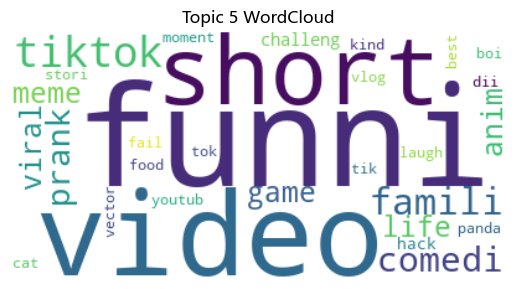

In [155]:
# Generate a word cloud for high-score topics using LDA weights
topic_id = 5
terms_weights = dict(lda.show_topic(topic_id, topn=30))

wc = WordCloud(background_color='white').generate_from_frequencies(terms_weights)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title(f"Topic {topic_id} WordCloud")
plt.show()

In [151]:
# Inspect representative titles from high-score topics
topic_5_titles = sample_df[sample_df['lda_topic'] == 5]['title']
print(topic_5_titles.sample(10).tolist())

['Wait! Treat Spiders To A Delicious Feast😄🕷️ #catvideos #catmemes #trending', 'Squid Game Premium 🦑 | #datminhtran #tradang #shots #viralvideo #squidgame #funny #challenge', '🦑Puff joins the Squid Game craze! Can he outsmart the competition? #PuffPlays #SquidGameChallenge', 'Troll mẹ ăn lựu giả máu gặp mẹ kiểu#shorts', 'Cool kitchen appliance for dispensing toothpicks! Fun gadgets by SMOL WOW', 'स्मार्ट शौचालय सीट कवर। अपनी सीट गर्म रखें! ठंडी और स्मार्ट दैनिक गैजेट  #smol', 'أداة ذكية مثالية لتسهيل تدريب استخدام القعادة! 🍼🚼', 'CUTE soap gadget 🧼 Your little ones will love it! #shorts', 'MATTHY EN RUSSO OVERLEVEN 24 UUR OP SZIGET', 'Wham! - Last Christmas (British Sign Language - Official Video)']


##### pyLDAvis

In [152]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

In [153]:
pyldavis_data = pyLDAvis.gensim_models.prepare(lda, corpus, dictionary)

c:\Users\lixin\ana\Lib\site-packages\pyLDAvis\_prepare.py:244: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)


In [154]:
pyLDAvis.display(pyldavis_data)

In [156]:
pyldavis_data.topic_order

[6, 1, 7, 3, 2, 4, 5]

In [157]:
for idx, lda_id in enumerate(pyldavis_data.topic_order):
    print(f"pyLDAvis Topic {idx+1} -> LDA Topic {lda_id}")

pyLDAvis Topic 1 -> LDA Topic 6
pyLDAvis Topic 2 -> LDA Topic 1
pyLDAvis Topic 3 -> LDA Topic 7
pyLDAvis Topic 4 -> LDA Topic 3
pyLDAvis Topic 5 -> LDA Topic 2
pyLDAvis Topic 6 -> LDA Topic 4
pyLDAvis Topic 7 -> LDA Topic 5


#### Evaluate and interprete the model performance

I used an LDA model to analyze the video tags, mainly to see if certain content themes are more closely related to trending videos. To make the analysis more reliable, I calculated the trend rate for each topic (i.e., the proportion of videos labeled as trending within that topic). I also added a custom score (trend rate × log of video count) to help balance trendiness and sample stability—so that small topics with high trend rates wouldn’t be overemphasized.

Besides the numbers, I also used pyLDAvis for visualization. This tool maps out each topic in a semantic space and shows the most representative keywords for each one. It gives a very intuitive view of which topics are more dominant or better defined.

Among all the topics, Topic 5 from the LDA model (which appears as Topic 1 in pyLDAvis) stood out the most. It had the highest trend score, and in the pyLDAvis plot, it was also the largest circle and positioned near the center. The top keywords for this topic include: "funny", "prank", "comedy", "tiktok", "short", "family", "video", etc.

These words suggest that the topic is mainly about lighthearted and humorous short videos—basically the kind of viral content often seen on platforms like TikTok. I also checked some sample titles from this group, and most of them matched this theme: playful, family-oriented, or comedic content.

This makes sense. On one hand, these types of videos naturally get more engagement and shares; on the other, platform algorithms tend to favor this style of content. So both the trend score and the visual position in pyLDAvis confirm that this is the strongest-performing topic overall.

### Integrate supervised and unsupervised

To connect the supervised and unsupervised parts of the project, I used the Random Forest model I trained earlier to predict which videos are likely to trend. I ran this prediction on the same 100,000 samples that I used for KMeans clustering.

Then I grouped the videos by KMeans cluster and calculated the average predicted trend rate and the actual trend rate (from the binary labels) for each cluster.

This helped me check if the clusters with high actual trend rates also get high predictions from the model. The results show that the predicted and true trend rates are pretty close in most clusters, which means the clusters are meaningful and the model does a good job recognizing trend-prone content.

In [217]:
sample_df['kmeans_cluster'] = kmeans.labels_

sample_df['predicted_trend'] = best_model.predict(X)

predicted_cluster_trend = sample_df.groupby('kmeans_cluster')['predicted_trend'].mean().rename('Predicted Trend Rate')

true_cluster_trend = sample_df.groupby('kmeans_cluster')['is_trend'].mean().rename('True Trend Rate')

trend_comparison = pd.concat([true_cluster_trend, predicted_cluster_trend], axis=1)

display(trend_comparison.sort_values(by='Predicted Trend Rate', ascending=False))

,True Trend Rate,Predicted Trend Rate
kmeans_cluster,,
19,0.902299,0.850575
0,0.297645,0.259101
18,0.246787,0.239075
9,0.254065,0.225610
20,0.209479,0.191469
21,0.134251,0.141136
23,0.176056,0.126761
1,0.126215,0.116209
24,0.134677,0.113468
